# Лабораторная работа: Геометрические алгоритмы в 2D


## Часть 1: Попадание точки в круг и треугольник

### Задание: Проверка геометрических положений

Реализуйте классы **Point**, **Circle** и **Triangle** для проверки попадания точки в круг и треугольник, аналогично лекции 9.

**Класс Point** хранит координаты `x, y` с методом `__str__`.

**Класс Circle** содержит центр (`Point`) и радиус, с методом для проверки `point_in_circle(point)`.

**Класс Triangle** содержит три вершины (`Point`), с методом `point_in_triangle(point)` на основе векторного произведения (barycentric coordinates).

**Генератор случайных точек** внутри ограничивающего прямоугольника, содержащего фигуры:

Создайте генератор `generate_points(xmin, xmax, ymin, ymax, n)`, который случайно создаёт `n` точек с координатами в данном диапазоне.

**Проверку** для всех сгенерированных точек попадания в круг и треугольник.

**Визуализацию** с помощью matplotlib:

- Отобразите круг и треугольник.
- Отметьте **зелёным** цветом точки, попавшие внутрь фигуры, **красным** — вне.
- Используйте различные маркеры для точек в круге и в треугольнике для наглядности.


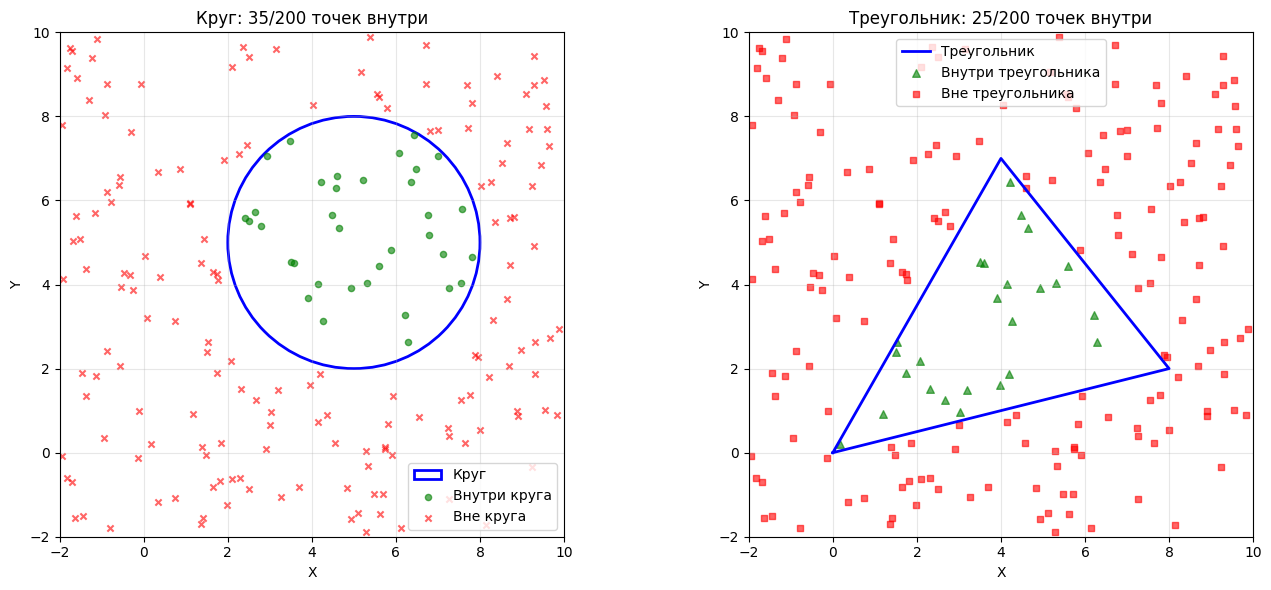

Всего точек: 200
Точек в круге: 35
Точек в треугольнике: 25


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y
    
    def __str__(self):
        return f"Point({self.x:.2f}, {self.y:.2f})"

class Circle:
    def __init__(self, center: Point, radius: float):
        self.center = center
        self.radius = radius
    
    def point_in_circle(self, point: Point) -> bool:
        """Проверка попадания точки в круг"""
        dx = point.x - self.center.x
        dy = point.y - self.center.y
        distance_squared = dx * dx + dy * dy
        return distance_squared <= self.radius * self.radius

class Triangle:
    def __init__(self, p1: Point, p2: Point, p3: Point):
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
    
    def point_in_triangle(self, point: Point) -> bool:
        """Проверка попадания точки в треугольник с помощью барицентрических координат"""
        def sign(p1: Point, p2: Point, p3: Point) -> float:
            return (p1.x - p3.x) * (p2.y - p3.y) - (p2.x - p3.x) * (p1.y - p3.y)
        
        d1 = sign(point, self.p1, self.p2)
        d2 = sign(point, self.p2, self.p3)
        d3 = sign(point, self.p3, self.p1)
        
        has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
        has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0)
        
        return not (has_neg and has_pos)

# Генератор случайных точек
def generate_points(xmin: float, xmax: float, ymin: float, ymax: float, n: int) -> List[Point]:
    """Генерирует n случайных точек в заданном прямоугольнике"""
    points = []
    for _ in range(n):
        x = np.random.uniform(xmin, xmax)
        y = np.random.uniform(ymin, ymax)
        points.append(Point(x, y))
    return points

circle = Circle(Point(5, 5), 3)
triangle = Triangle(Point(0, 0), Point(8, 2), Point(4, 7))

np.random.seed(42)
points = generate_points(-2, 10, -2, 10, 200)

points_in_circle = []
points_out_circle = []
points_in_triangle = []
points_out_triangle = []

for point in points:
    if circle.point_in_circle(point):
        points_in_circle.append(point)
    else:
        points_out_circle.append(point)
    
    if triangle.point_in_triangle(point):
        points_in_triangle.append(point)
    else:
        points_out_triangle.append(point)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Отрисовка круга
circle_plot = plt.Circle((circle.center.x, circle.center.y), circle.radius, 
                         fill=False, edgecolor='blue', linewidth=2, label='Круг')
ax1.add_patch(circle_plot)

# Точки для круга
if points_in_circle:
    ax1.scatter([p.x for p in points_in_circle], [p.y for p in points_in_circle], 
               c='green', marker='o', s=20, alpha=0.6, label='Внутри круга')
if points_out_circle:
    ax1.scatter([p.x for p in points_out_circle], [p.y for p in points_out_circle], 
               c='red', marker='x', s=20, alpha=0.6, label='Вне круга')

ax1.set_xlim(-2, 10)
ax1.set_ylim(-2, 10)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_title(f'Круг: {len(points_in_circle)}/{len(points)} точек внутри')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Отрисовка треугольника
triangle_x = [triangle.p1.x, triangle.p2.x, triangle.p3.x, triangle.p1.x]
triangle_y = [triangle.p1.y, triangle.p2.y, triangle.p3.y, triangle.p1.y]
ax2.plot(triangle_x, triangle_y, 'b-', linewidth=2, label='Треугольник')

# Точки для треугольника
if points_in_triangle:
    ax2.scatter([p.x for p in points_in_triangle], [p.y for p in points_in_triangle], 
               c='green', marker='^', s=30, alpha=0.6, label='Внутри треугольника')
if points_out_triangle:
    ax2.scatter([p.x for p in points_out_triangle], [p.y for p in points_out_triangle], 
               c='red', marker='s', s=20, alpha=0.6, label='Вне треугольника')

ax2.set_xlim(-2, 10)
ax2.set_ylim(-2, 10)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_title(f'Треугольник: {len(points_in_triangle)}/{len(points)} точек внутри')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.tight_layout()
plt.show()

print(f"Всего точек: {len(points)}")
print(f"Точек в круге: {len(points_in_circle)}")
print(f"Точек в треугольнике: {len(points_in_triangle)}")

## Часть 2: Пересечение отрезков и окружностей

### Задание: Алгоритмы геометрического пересечения

Расширьте систему классов из Части 1 для проверки пересечения отрезков с окружностями и отрезков между собой.

**Класс Segment** содержит две вершины (`Point` A и B), с методами:
- `__str__` для отображения отрезка
- `length()` — вычисление длины отрезка
- `intersects_circle(circle)` — проверка пересечения отрезка с окружностью (возвращает список точек пересечения или пустой список)
- `intersects_segment(other)` — проверка пересечения двух отрезков (возвращает точку пересечения или None)

**Реализация алгоритмов пересечения:**
- **Отрезок ↔ Окружность**: Решение квадратного уравнения для расстояния от центра окружности до отрезка 
- **Отрезок ↔ Отрезок**: Метод на основе векторного произведения и параметризации (ориентация точек) 

**Генератор тестовых конфигураций:**
- `generate_segments(n, xmin, xmax, ymin, ymax)` — генератор n случайных отрезков в прямоугольнике
- Создайте несколько тестовых окружностей и отобразите все возможные случаи пересечения

**Визуализация с помощью matplotlib:**
- Отобразите окружность(и) и множество отрезков
- **Зелёные отрезки** — пересекают окружность (отметьте точки пересечения)
- **Синие отрезки** — полностью внутри окружности
- **Красные отрезки** — полностью вне окружности  
- **Жёлтые точки** — точки пересечения отрезков между собой
- Используйте легенду и сетку для наглядности


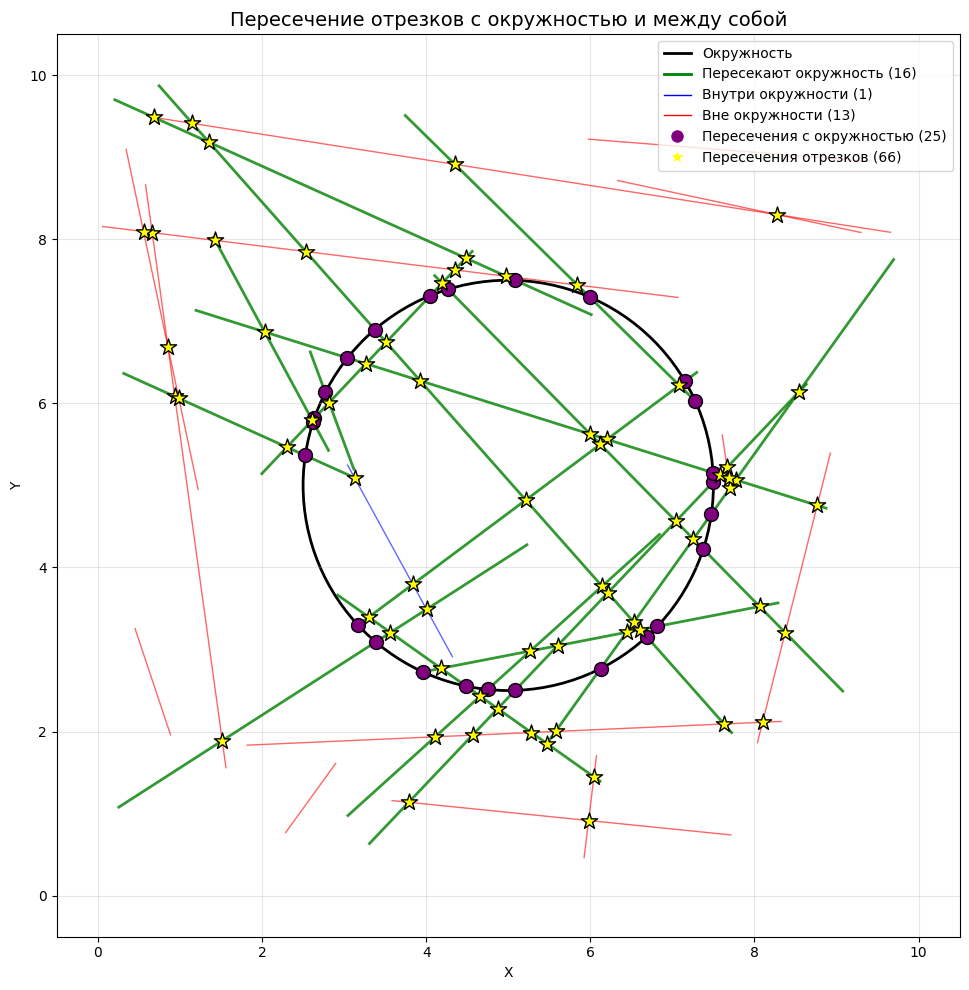

Всего отрезков: 30
Пересекают окружность: 16
Полностью внутри: 1
Полностью вне: 13
Точек пересечения с окружностью: 25
Точек пересечения отрезков между собой: 66


In [ ]:
import math

class Segment:
    def __init__(self, a: Point, b: Point):
        self.a = a
        self.b = b
    
    def __str__(self):
        return f"Segment({self.a}, {self.b})"
    
    def length(self) -> float:
        """Вычисление длины отрезка"""
        dx = self.b.x - self.a.x
        dy = self.b.y - self.a.y
        return math.sqrt(dx * dx + dy * dy)
    
    def intersects_circle(self, circle: Circle) -> List[Point]:
        """Проверка пересечения отрезка с окружностью"""
        dx = self.b.x - self.a.x
        dy = self.b.y - self.a.y
        
        fx = self.a.x - circle.center.x
        fy = self.a.y - circle.center.y
        
        # Квадратное уравнение: at^2 + bt + c = 0
        a = dx * dx + dy * dy
        b = 2 * (fx * dx + fy * dy)
        c = fx * fx + fy * fy - circle.radius * circle.radius
        
        discriminant = b * b - 4 * a * c
        
        if discriminant < 0:
            return []  # Нет пересечений
        
        discriminant = math.sqrt(discriminant)
        t1 = (-b - discriminant) / (2 * a)
        t2 = (-b + discriminant) / (2 * a)
        
        intersections = []
        
        if 0 <= t1 <= 1:
            x = self.a.x + t1 * dx
            y = self.a.y + t1 * dy
            intersections.append(Point(x, y))
        
        if 0 <= t2 <= 1 and abs(t1 - t2) > 1e-9:  # Проверка на разные точки
            x = self.a.x + t2 * dx
            y = self.a.y + t2 * dy
            intersections.append(Point(x, y))
        
        return intersections
    
    def intersects_segment(self, other: 'Segment') -> Point:
        """Проверка пересечения двух отрезков"""
        x1, y1 = self.a.x, self.a.y
        x2, y2 = self.b.x, self.b.y
        x3, y3 = other.a.x, other.a.y
        x4, y4 = other.b.x, other.b.y
        
        denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
        
        if abs(denom) < 1e-9:
            return None  # Отрезки параллельны
        
        t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / denom
        u = -((x1 - x2) * (y1 - y3) - (y1 - y2) * (x1 - x3)) / denom
        
        if 0 <= t <= 1 and 0 <= u <= 1:
            x = x1 + t * (x2 - x1)
            y = y1 + t * (y2 - y1)
            return Point(x, y)
        
        return None

def generate_segments(n: int, xmin: float, xmax: float, ymin: float, ymax: float) -> List[Segment]:
    """Генерирует n случайных отрезков в заданном прямоугольнике"""
    segments = []
    for _ in range(n):
        p1 = Point(np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax))
        p2 = Point(np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax))
        segments.append(Segment(p1, p2))
    return segments

np.random.seed(42)
circle_test = Circle(Point(5, 5), 2.5)
segments = generate_segments(30, 0, 10, 0, 10)

# Классификация отрезков
intersecting_segments = []  # Пересекают окружность
inside_segments = []        # Полностью внутри
outside_segments = []       # Полностью вне
intersection_points = []    # Точки пересечения с окружностью

for segment in segments:
    intersections = segment.intersects_circle(circle_test)
    
    # Проверяем, находятся ли концы отрезка внутри окружности
    a_inside = circle_test.point_in_circle(segment.a)
    b_inside = circle_test.point_in_circle(segment.b)
    
    if len(intersections) > 0:
        intersecting_segments.append(segment)
        intersection_points.extend(intersections)
    elif a_inside and b_inside:
        inside_segments.append(segment)
    else:
        outside_segments.append(segment)

segment_intersections = []
for i in range(len(segments)):
    for j in range(i + 1, len(segments)):
        intersection = segments[i].intersects_segment(segments[j])
        if intersection is not None:
            segment_intersections.append(intersection)

plt.figure(figsize=(12, 10))

circle_plot = plt.Circle((circle_test.center.x, circle_test.center.y), 
                         circle_test.radius, fill=False, edgecolor='black', 
                         linewidth=2, label='Окружность')
plt.gca().add_patch(circle_plot)

# Отрезки вне окружности (красные)
for seg in outside_segments:
    plt.plot([seg.a.x, seg.b.x], [seg.a.y, seg.b.y], 'r-', linewidth=1, alpha=0.6)

# Отрезки внутри окружности (синие)
for seg in inside_segments:
    plt.plot([seg.a.x, seg.b.x], [seg.a.y, seg.b.y], 'b-', linewidth=1, alpha=0.6)

# Отрезки, пересекающие окружность (зелёные)
for seg in intersecting_segments:
    plt.plot([seg.a.x, seg.b.x], [seg.a.y, seg.b.y], 'g-', linewidth=2, alpha=0.8)

# Точки пересечения отрезков с окружностью (фиолетовые)
if intersection_points:
    plt.scatter([p.x for p in intersection_points], [p.y for p in intersection_points], 
               c='purple', marker='o', s=100, zorder=5, edgecolors='black', linewidths=1,
               label='Пересечения с окружностью')

# Точки пересечения отрезков между собой (жёлтые)
if segment_intersections:
    plt.scatter([p.x for p in segment_intersections], [p.y for p in segment_intersections], 
               c='yellow', marker='*', s=150, zorder=6, edgecolors='black', linewidths=1,
               label='Пересечения отрезков')

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='black', linewidth=2, label='Окружность'),
    Line2D([0], [0], color='g', linewidth=2, label=f'Пересекают окружность ({len(intersecting_segments)})'),
    Line2D([0], [0], color='b', linewidth=1, label=f'Внутри окружности ({len(inside_segments)})'),
    Line2D([0], [0], color='r', linewidth=1, label=f'Вне окружности ({len(outside_segments)})'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, 
           label=f'Пересечения с окружностью ({len(intersection_points)})'),
    Line2D([0], [0], marker='*', color='w', markerfacecolor='yellow', markersize=12, 
           label=f'Пересечения отрезков ({len(segment_intersections)})')
]

plt.legend(handles=legend_elements, loc='upper right')
plt.xlim(-0.5, 10.5)
plt.ylim(-0.5, 10.5)
plt.gca().set_aspect('equal')
plt.grid(True, alpha=0.3)
plt.title('Пересечение отрезков с окружностью и между собой', fontsize=14)
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

print(f"Всего отрезков: {len(segments)}")
print(f"Пересекают окружность: {len(intersecting_segments)}")
print(f"Полностью внутри: {len(inside_segments)}")
print(f"Полностью вне: {len(outside_segments)}")
print(f"Точек пересечения с окружностью: {len(intersection_points)}")
print(f"Точек пересечения отрезков между собой: {len(segment_intersections)}")

## Часть 3: Формула Гаусса для площади многоугольника

### Задание: Вычисление площади произвольных многоугольников

Реализуйте класс **Polygon** для работы с многоугольниками и вычисления их площади по формуле Гаусса (шнуровки).

**Класс Polygon** содержит список вершин (`List[Point]`), с методами:
- `__init__(vertices: List[Point])` — конструктор (проверка на самопересечение опционально)
- `__str__()` — отображение координат вершин
- `area()` — вычисление площади по формуле Гаусса:  
  $S = \frac{1}{2} \left| \sum_{i=1}^{n} (x_i y_{i+1} - x_{i+1} y_i) \right| $,  
  где по соглашению \( (x_{n+1}, y_{n+1}) = (x_1, y_1) \).
- `is_convex()` — проверка выпуклости многоугольника
- `centroid()` — вычисление центра масс (средневзвешенных координат)




**Генератор многоугольников:**
- `generate_polygons(n, xmin, xmax, ymin, ymax, min_sides=3, max_sides=8)` — генератор n случайных выпуклых/вогнутых многоугольников
- `generate_regular_polygon(sides, center, radius)` — правильный многоугольник

**Визуализация с помощью matplotlib:**
- Отобразите несколько многоугольников разных форм
- **Заливка** пропорциональна площади (alpha=0.5, разные цвета)
- **Подписи** с точной площадью рядом с каждым многоугольником
- **Сравнение** с площадью по разбиению на треугольники (для проверки)
- **Легенда** с площадями и типом (выпуклый/вогнутый)


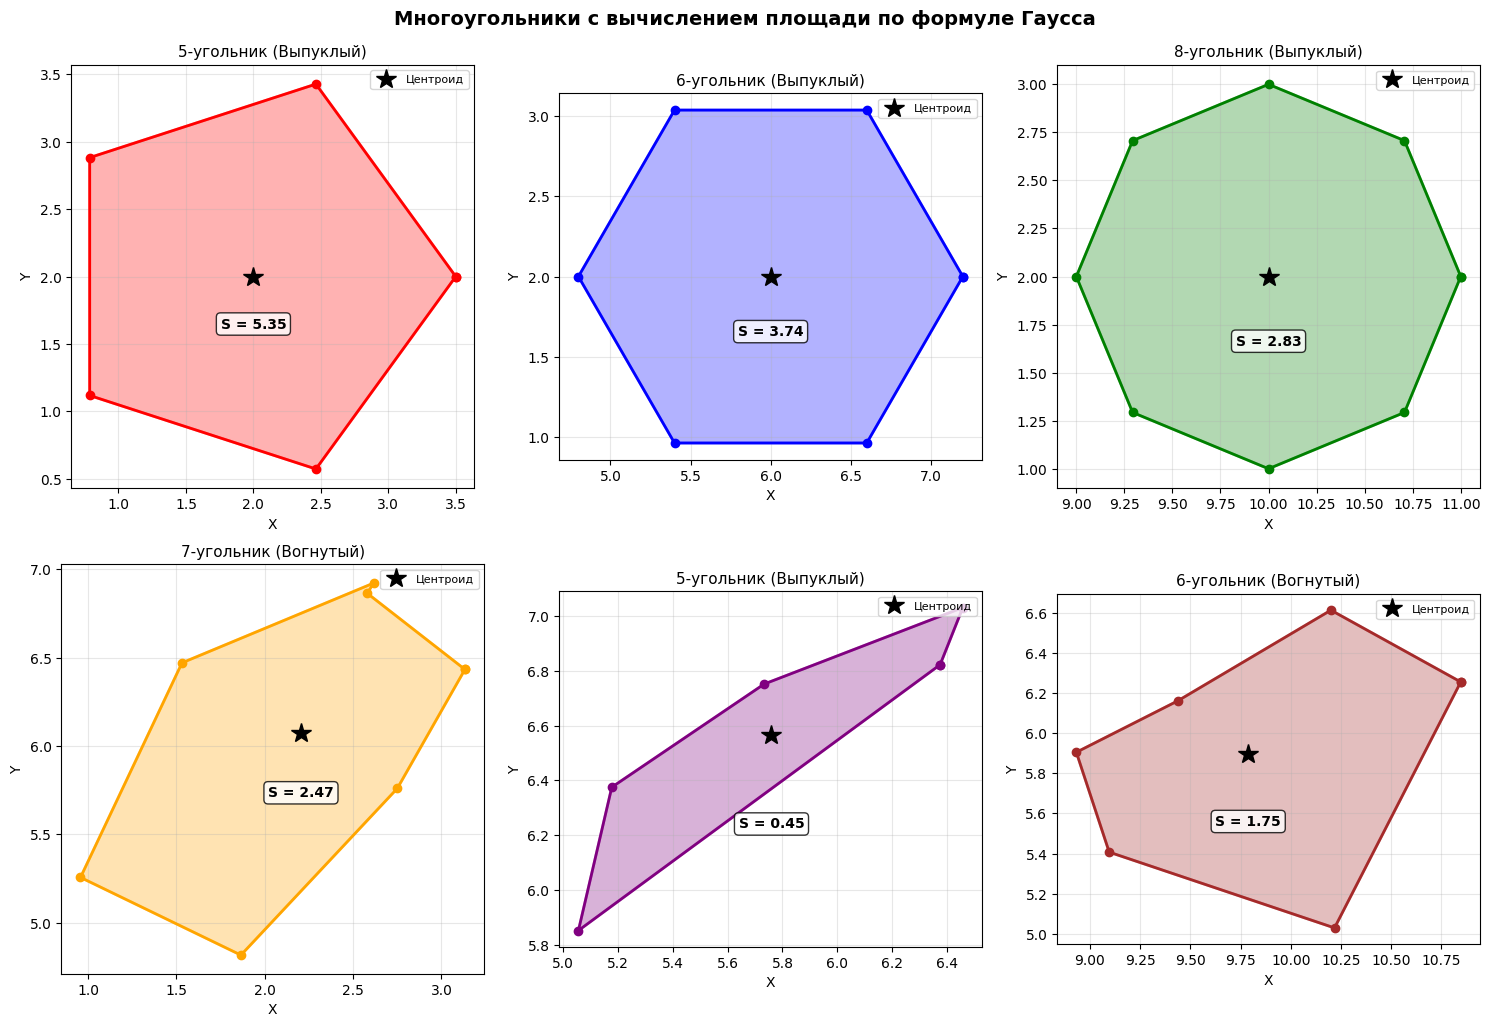


ИНФОРМАЦИЯ О МНОГОУГОЛЬНИКАХ

Многоугольник 1:
  Количество вершин: 5
  Тип: Выпуклый
  Площадь (формула Гаусса): 5.3497
  Центроид: (2.00, 2.00)

Многоугольник 2:
  Количество вершин: 6
  Тип: Выпуклый
  Площадь (формула Гаусса): 3.7412
  Центроид: (6.00, 2.00)

Многоугольник 3:
  Количество вершин: 8
  Тип: Выпуклый
  Площадь (формула Гаусса): 2.8284
  Центроид: (10.00, 2.00)

Многоугольник 4:
  Количество вершин: 7
  Тип: Вогнутый
  Площадь (формула Гаусса): 2.4700
  Центроид: (2.21, 6.07)

Многоугольник 5:
  Количество вершин: 5
  Тип: Выпуклый
  Площадь (формула Гаусса): 0.4518
  Центроид: (5.76, 6.57)

Многоугольник 6:
  Количество вершин: 6
  Тип: Вогнутый
  Площадь (формула Гаусса): 1.7493
  Центроид: (9.79, 5.89)

ПРОВЕРКА: Сравнение с методом триангуляции

Многоугольник 1:
  Формула Гаусса: 5.349693
  Триангуляция:   5.349693
  Разница:        0.000000 (✓)

Многоугольник 2:
  Формула Гаусса: 3.741230
  Триангуляция:   3.741230
  Разница:        0.000000 (✓)

Многоугольник 3:

In [ ]:
class Polygon:
    def __init__(self, vertices: List[Point]):
        if len(vertices) < 3:
            raise ValueError("Многоугольник должен иметь не менее 3 вершин")
        self.vertices = vertices
    
    def __str__(self):
        vertex_str = ", ".join([f"({v.x:.2f}, {v.y:.2f})" for v in self.vertices])
        return f"Polygon([{vertex_str}])"
    
    def area(self) -> float:
        """Вычисление площади по формуле Гаусса"""
        n = len(self.vertices)
        area_sum = 0.0
        
        for i in range(n):
            j = (i + 1) % n  # Следующая вершина (циклически)
            area_sum += self.vertices[i].x * self.vertices[j].y
            area_sum -= self.vertices[j].x * self.vertices[i].y
        
        return abs(area_sum) / 2.0
    
    def is_convex(self) -> bool:
        """Проверка выпуклости многоугольника"""
        n = len(self.vertices)
        if n < 3:
            return False
        
        sign = None
        for i in range(n):
            v1 = self.vertices[i]
            v2 = self.vertices[(i + 1) % n]
            v3 = self.vertices[(i + 2) % n]
            
            # Векторное произведение
            cross = (v2.x - v1.x) * (v3.y - v2.y) - (v2.y - v1.y) * (v3.x - v2.x)
            
            if abs(cross) > 1e-9:
                if sign is None:
                    sign = cross > 0
                elif (cross > 0) != sign:
                    return False
        
        return True
    
    def centroid(self) -> Point:
        """Вычисление центра масс (центроида)"""
        n = len(self.vertices)
        cx = sum(v.x for v in self.vertices) / n
        cy = sum(v.y for v in self.vertices) / n
        return Point(cx, cy)

def generate_regular_polygon(sides: int, center: Point, radius: float) -> Polygon:
    """Генерирует правильный многоугольник"""
    vertices = []
    for i in range(sides):
        angle = 2 * math.pi * i / sides
        x = center.x + radius * math.cos(angle)
        y = center.y + radius * math.sin(angle)
        vertices.append(Point(x, y))
    return Polygon(vertices)

def generate_convex_polygon(n_vertices: int, center: Point, max_radius: float) -> Polygon:
    """Генерирует случайный выпуклый многоугольник"""
    angles = sorted([np.random.uniform(0, 2 * math.pi) for _ in range(n_vertices)])
    vertices = []
    for angle in angles:
        r = np.random.uniform(max_radius * 0.5, max_radius)
        x = center.x + r * math.cos(angle)
        y = center.y + r * math.sin(angle)
        vertices.append(Point(x, y))
    return Polygon(vertices)

np.random.seed(42)

polygons = [
    generate_regular_polygon(5, Point(2, 2), 1.5),       # Правильный пятиугольник
    generate_regular_polygon(6, Point(6, 2), 1.2),       # Правильный шестиугольник
    generate_regular_polygon(8, Point(10, 2), 1.0),      # Правильный восьмиугольник
    generate_convex_polygon(7, Point(2, 6), 1.3),        # Случайный выпуклый 7-угольник
    generate_convex_polygon(5, Point(6, 6), 1.4),        # Случайный выпуклый 5-угольник
    generate_convex_polygon(6, Point(10, 6), 1.1),       # Случайный выпуклый 6-угольник
]

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (polygon, color) in enumerate(zip(polygons, colors)):
    ax = axes[idx]
    
    x_coords = [v.x for v in polygon.vertices] + [polygon.vertices[0].x]
    y_coords = [v.y for v in polygon.vertices] + [polygon.vertices[0].y]
    
    # Рисуем многоугольник
    ax.fill(x_coords, y_coords, color=color, alpha=0.3, edgecolor=color, linewidth=2)
    ax.plot(x_coords, y_coords, 'o-', color=color, markersize=6, linewidth=2)
    
    area = polygon.area()
    
    poly_type = "Выпуклый" if polygon.is_convex() else "Вогнутый"
    
    centroid = polygon.centroid()
    ax.plot(centroid.x, centroid.y, 'k*', markersize=15, label='Центроид')
    
    ax.text(centroid.x, centroid.y - 0.3, f'S = {area:.2f}', 
           ha='center', va='top', fontsize=10, fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_title(f'{len(polygon.vertices)}-угольник ({poly_type})', fontsize=11)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.suptitle('Многоугольники с вычислением площади по формуле Гаусса', 
            fontsize=14, fontweight='bold', y=1.02)
plt.show()

print("\n" + "="*60)
print("ИНФОРМАЦИЯ О МНОГОУГОЛЬНИКАХ")
print("="*60)

for idx, polygon in enumerate(polygons, 1):
    area = polygon.area()
    is_convex = polygon.is_convex()
    centroid = polygon.centroid()
    
    print(f"\nМногоугольник {idx}:")
    print(f"  Количество вершин: {len(polygon.vertices)}")
    print(f"  Тип: {'Выпуклый' if is_convex else 'Вогнутый'}")
    print(f"  Площадь (формула Гаусса): {area:.4f}")
    print(f"  Центроид: ({centroid.x:.2f}, {centroid.y:.2f})")

print("\n" + "="*60)
print("ПРОВЕРКА: Сравнение с методом триангуляции")
print("="*60)

def area_by_triangulation(polygon: Polygon) -> float:
    """Вычисление площади разбиением на треугольники от центроида"""
    centroid = polygon.centroid()
    n = len(polygon.vertices)
    total_area = 0.0
    
    for i in range(n):
        j = (i + 1) % n
        triangle = Triangle(centroid, polygon.vertices[i], polygon.vertices[j])
        # Площадь треугольника по векторному произведению
        v1x = polygon.vertices[i].x - centroid.x
        v1y = polygon.vertices[i].y - centroid.y
        v2x = polygon.vertices[j].x - centroid.x
        v2y = polygon.vertices[j].y - centroid.y
        tri_area = abs(v1x * v2y - v1y * v2x) / 2.0
        total_area += tri_area
    
    return total_area

for idx, polygon in enumerate(polygons, 1):
    area_gauss = polygon.area()
    area_tri = area_by_triangulation(polygon)
    difference = abs(area_gauss - area_tri)
    
    print(f"\nМногоугольник {idx}:")
    print(f"  Формула Гаусса: {area_gauss:.6f}")
    print(f"  Триангуляция:   {area_tri:.6f}")
    print(f"  Разница:        {difference:.6f} ({'✓' if difference < 0.001 else '✗'})")

# Прикладная задача
## Оценка площади озера по спутниковому снимку 

По результатам сегментации спутникового изображения береговая линия озера аппроксимирована многоугольником с вершинами в пиксельных координатах. Известно пространственное разрешение снимка (например, 1 пиксель = 2 м по обеим осям).

### Задача
- Перевести координаты вершин из пикселей в метры, умножив каждую координату на масштаб:  
  $x'_i = s_x * x_i,  y'_i = s_y * y_i$  (для квадратного пикселя s_x = s_y = s).
- С помощью формулы Гаусса вычислить площадь озера в квадратных метрах и гектарах:  
  $S = 1/2 * | Σ_{i=1}^{n} (x'_i y'_{i+1} - x'_{i+1} y'_i) |, где (x'_{n+1}, y'_{n+1}) = (x'_1, y'_1)$; затем S_га = S / 10 000.
- Сравнить полученную площадь с заданным порогом (например, 10 гектаров), чтобы классифицировать объект как «малое озеро» или «крупный водоём».


## Чтобы узнать вариант введите ваш номер в списке

In [4]:
print(int(input("Введите номер в списке: "))%6)

2


## Вариант 1: Озеро в Карелии (малый водоём)

**Название объекта:** Озеро Малое Круглое  
**Местоположение:** Республика Карелия  

**Координаты береговой линии (пиксели на снимке):**

[
(145, 87), (162, 76), (188, 81), (201, 94),
(208, 112), (194, 128), (172, 135), (151, 130),
(133, 117), (126, 101), (129, 89)
]

**Пространственное разрешение:** 1 пиксель = 1.5 метра  
**Порог классификации:** 5 гектаров (для малых озёр)  

---
## Вариант 2: Старица реки Волги

**Название объекта:** Старица "Подкова"  
**Местоположение:** Волго-Ахтубинская пойма, Астраханская область  

**Координаты (пиксели):**

[
(320, 180), (340, 165), (370, 160), (400, 165),
(420, 180), (435, 200), (440, 225), (430, 250),
(410, 265), (380, 270), (350, 260), (330, 240),
(315, 220), (310, 200)
]

**Пространственное разрешение:** 1 пиксель = 2.0 метра  
**Порог классификации:** 8 гектаров  

---

## Вариант 3: Городской пруд (искусственный водоём)

**Название объекта:** Парковый пруд "Зеркальный"  
**Местоположение:** Городской парк, Москва  

**Координаты (пиксели):**

[
(80, 120), (110, 100), (150, 95), (190, 105),
(220, 125), (235, 155), (220, 185), (190, 205),
(150, 210), (110, 200), (80, 180), (65, 150)
]

**Пространственное разрешение:** 1 пиксель = 0.5 метра (высокое разрешение)  
**Порог классификации:** 2 гектара (для городских объектов)  

---

## Вариант 4: Альпийское ледниковое озеро

**Название объекта:** Ледниковое озеро "Голубое"  
**Местоположение:** Кавказские горы, высота 2800 м  

**Координаты (пиксели):**

[
(50, 70), (85, 55), (125, 50), (165, 60),
(195, 80), (210, 110), (200, 145), (170, 170),
(130, 180), (90, 170), (60, 150), (40, 120),
(35, 95)
]

**Пространственное разрешение:** 1 пиксель = 4.0 метра (низкое разрешение горной съёмки)  
**Порог классификации:** 15 гектаров (горные озёра)  

---

## Вариант 5: Водохранилище на малой реке

**Название объекта:** Водохранилище "Приозерное"  
**Местоположение:** Смоленская область  

**Координаты (пиксели):**

[
(200, 100), (250, 80), (310, 85), (360, 105),
(400, 140), (420, 185), (405, 230), (360, 260),
(300, 270), (240, 250), (200, 220), (180, 180),
(175, 140), (185, 115)
]

**Пространственное разрешение:** 1 пиксель = 3.0 метра  
**Порог классификации:** 20 гектаров (водохранилища)  

---

## Вариант 6: Техногенный карьер, заполненный водой

**Название объекта:** Затопленный карьер "Северный"  
**Местоположение:** Кемеровская область, бывший угольный разрез  

**Координаты (пиксели):**

[
(90, 60), (130, 40), (180, 35), (230, 45),
(270, 70), (295, 105), (300, 145), (285, 185),
(250, 215), (200, 225), (150, 210), (110, 180),
(85, 140), (80, 100)
]

**Пространственное разрешение:** 1 пиксель = 2.5 метра  
**Порог классификации:** 10 гектаров (техногенные объекты)  


ВАРИАНТ 2: Старица "Подкова"
Местоположение: Волго-Ахтубинская пойма, Астраханская область

Исходные данные:
  • Количество точек береговой линии: 14
  • Пространственное разрешение: 2.0 м/пиксель
  • Порог классификации: 8 га

──────────────────────────────────────────────────────────────────────
ШАГ 1: Преобразование координат из пикселей в метры
──────────────────────────────────────────────────────────────────────
  Точка 1: (320, 180) пикс → (640.0, 360.0) м
  Точка 2: (340, 165) пикс → (680.0, 330.0) м
  Точка 3: (370, 160) пикс → (740.0, 320.0) м
  ...
  Точка 14: (310, 200) пикс → (620.0, 400.0) м

──────────────────────────────────────────────────────────────────────
ШАГ 2: Вычисление площади по формуле Гаусса
──────────────────────────────────────────────────────────────────────

Формула Гаусса: S = 1/2 × |Σ(x_i × y_(i+1) - x_(i+1) × y_i)|

Вычисление:
  i=0: x0×y1 - x1×y0 = 211200.0 - 244800.0 = -33600.0
  i=1: x1×y2 - x2×y1 = 217600.0 - 244200.0 = -26600.0
  ...

  Сумма: 8

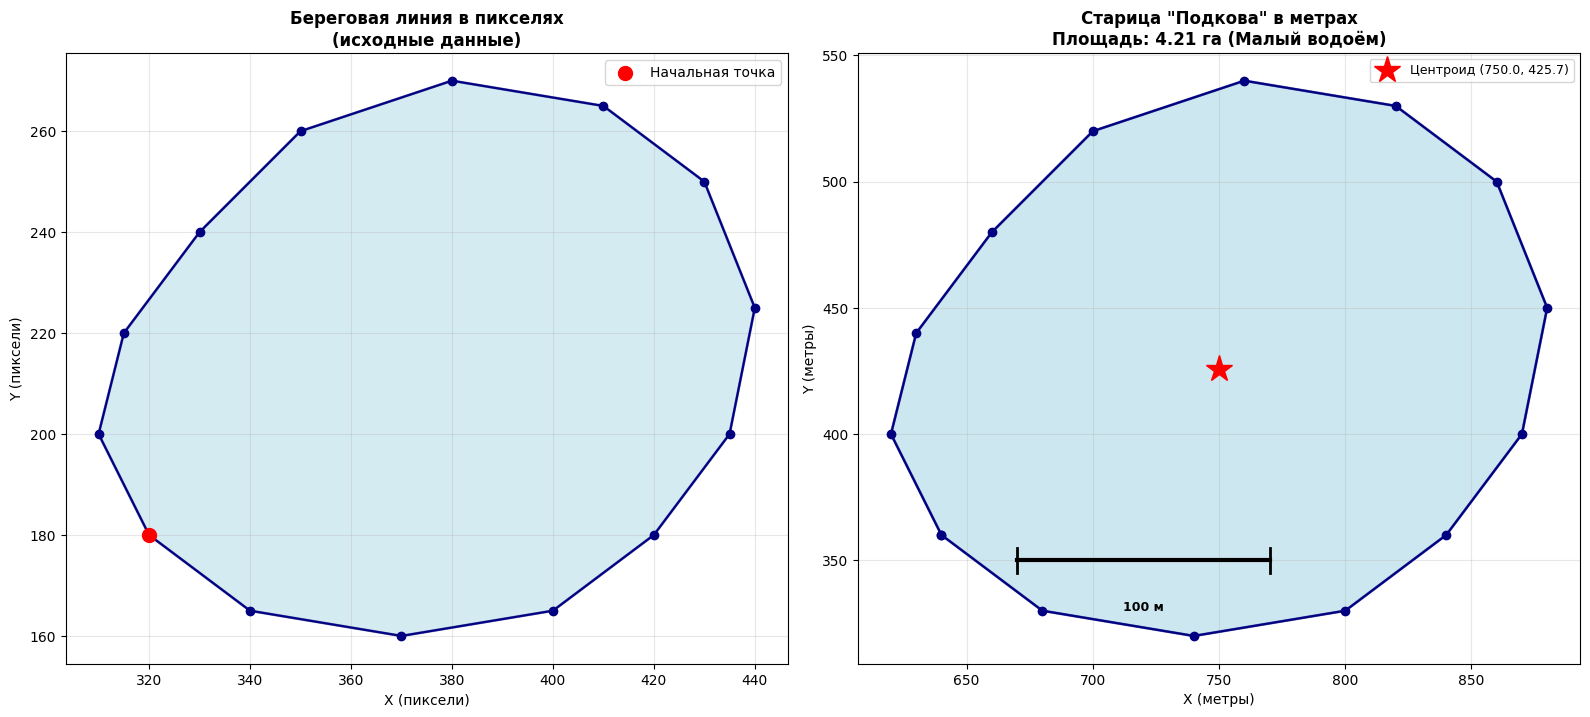


ИТОГОВАЯ СВОДКА

  Объект: Старица "Подкова"
  Местоположение: Волго-Ахтубинская пойма, Астраханская область

  Площадь:
    • 42,150.00 м²
    • 4.2150 га
    • 0.042150 км²

  Периметр: 743.09 м
  Форма: Выпуклая

  Классификация: Малый водоём
  (порог: 8 га)



In [18]:
# ВАРИАНТ 2: Старица "Подкова"
# Волго-Ахтубинская пойма, Астраханская область

print("="*70)
print("ВАРИАНТ 2: Старица \"Подкова\"")
print("Местоположение: Волго-Ахтубинская пойма, Астраханская область")
print("="*70)

# Исходные данные
pixel_coordinates = [
    (320, 180), (340, 165), (370, 160), (400, 165),
    (420, 180), (435, 200), (440, 225), (430, 250),
    (410, 265), (380, 270), (350, 260), (330, 240),
    (315, 220), (310, 200)
]

spatial_resolution = 2.0
classification_threshold = 8

print(f"\nИсходные данные:")
print(f"  • Количество точек береговой линии: {len(pixel_coordinates)}")
print(f"  • Пространственное разрешение: {spatial_resolution} м/пиксель")
print(f"  • Порог классификации: {classification_threshold} га")

# Шаг 1: Преобразование координат из пикселей в метры
print(f"\n{'─'*70}")
print("ШАГ 1: Преобразование координат из пикселей в метры")
print(f"{'─'*70}")

meter_coordinates = []
for i, (x_pix, y_pix) in enumerate(pixel_coordinates):
    x_m = x_pix * spatial_resolution
    y_m = y_pix * spatial_resolution
    meter_coordinates.append((x_m, y_m))
    if i < 3 or i >= len(pixel_coordinates) - 1:  # Показываем первые 3 и последнюю
        print(f"  Точка {i+1}: ({x_pix}, {y_pix}) пикс → ({x_m:.1f}, {y_m:.1f}) м")
    elif i == 3:
        print(f"  ...")

vertices = [Point(x, y) for x, y in meter_coordinates]
lake_polygon = Polygon(vertices)

# Шаг 2: Вычисление площади по формуле Гаусса
print(f"\n{'─'*70}")
print("ШАГ 2: Вычисление площади по формуле Гаусса")
print(f"{'─'*70}")

print(f"\nФормула Гаусса: S = 1/2 × |Σ(x_i × y_(i+1) - x_(i+1) × y_i)|")
print(f"\nВычисление:")

area_sum = 0.0
n = len(vertices)
for i in range(n):
    j = (i + 1) % n
    term1 = vertices[i].x * vertices[j].y
    term2 = vertices[j].x * vertices[i].y
    contribution = term1 - term2
    area_sum += contribution
    
    if i < 2:
        print(f"  i={i}: x{i}×y{j} - x{j}×y{i} = {term1:.1f} - {term2:.1f} = {contribution:.1f}")
    elif i == 2:
        print(f"  ...")

area_m2 = abs(area_sum) / 2.0
area_ha = area_m2 / 10000

print(f"\n  Сумма: {area_sum:.2f}")
print(f"  Площадь = |{area_sum:.2f}| / 2 = {area_m2:.2f} м²")

# Шаг 3: Перевод в гектары
print(f"\n{'─'*70}")
print("ШАГ 3: Перевод площади в гектары")
print(f"{'─'*70}")

print(f"\n  1 гектар = 10 000 м²")
print(f"  Площадь = {area_m2:.2f} м² ÷ 10 000 = {area_ha:.4f} га")

# Шаг 4: Классификация
print(f"\n{'─'*70}")
print("ШАГ 4: Классификация водоёма")
print(f"{'─'*70}")

if area_ha < classification_threshold:
    classification = "Малый водоём"
    symbol = "✓"
    comparison = "<"
else:
    classification = "Крупный водоём"
    symbol = "✗"
    comparison = "≥"

print(f"\n  Площадь: {area_ha:.4f} га")
print(f"  Порог: {classification_threshold} га")
print(f"  Сравнение: {area_ha:.4f} га {comparison} {classification_threshold} га")
print(f"\n  {symbol} Классификация: {classification}")

print(f"\n{'─'*70}")
print("ДОПОЛНИТЕЛЬНЫЕ ХАРАКТЕРИСТИКИ")
print(f"{'─'*70}")

perimeter = sum(Segment(vertices[i], vertices[(i+1)%n]).length() for i in range(n))
centroid = lake_polygon.centroid()
is_convex = lake_polygon.is_convex()

print(f"\n  • Периметр: {perimeter:.2f} м")
print(f"  • Центроид: ({centroid.x:.2f}, {centroid.y:.2f}) м")
print(f"  • Форма: {'Выпуклая' if is_convex else 'Вогнутая'}")

print(f"\n{'─'*70}")
print("ВИЗУАЛИЗАЦИЯ")
print(f"{'─'*70}\n")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# График 1
ax1.set_title('Береговая линия в пикселях\n(исходные данные)', 
             fontsize=12, fontweight='bold')
x_pix = [coord[0] for coord in pixel_coordinates] + [pixel_coordinates[0][0]]
y_pix = [coord[1] for coord in pixel_coordinates] + [pixel_coordinates[0][1]]
ax1.fill(x_pix, y_pix, color='lightblue', alpha=0.5, edgecolor='navy', linewidth=2)
ax1.plot(x_pix, y_pix, 'o-', color='navy', markersize=6, linewidth=1.5)
ax1.scatter([pixel_coordinates[0][0]], [pixel_coordinates[0][1]], 
           color='red', s=100, zorder=5, label='Начальная точка')
ax1.set_xlabel('X (пиксели)', fontsize=10)
ax1.set_ylabel('Y (пиксели)', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_aspect('equal')

# График 2
ax2.set_title(f'Старица "Подкова" в метрах\nПлощадь: {area_ha:.2f} га ({classification})', 
             fontsize=12, fontweight='bold')
x_m = [coord[0] for coord in meter_coordinates] + [meter_coordinates[0][0]]
y_m = [coord[1] for coord in meter_coordinates] + [meter_coordinates[0][1]]

color = 'lightblue' if classification == "Малый водоём" else 'darkblue'
ax2.fill(x_m, y_m, color=color, alpha=0.6, edgecolor='navy', linewidth=2)
ax2.plot(x_m, y_m, 'o-', color='navy', markersize=6, linewidth=1.5)

ax2.plot(centroid.x, centroid.y, 'r*', markersize=20, 
        label=f'Центроид ({centroid.x:.1f}, {centroid.y:.1f})')

scale_length = 100  # метров
scale_x = min(x_m) + 50
scale_y = min(y_m) + 30
ax2.plot([scale_x, scale_x + scale_length], [scale_y, scale_y], 
        'k-', linewidth=3)
ax2.plot([scale_x, scale_x], [scale_y - 5, scale_y + 5], 'k-', linewidth=2)
ax2.plot([scale_x + scale_length, scale_x + scale_length], 
        [scale_y - 5, scale_y + 5], 'k-', linewidth=2)
ax2.text(scale_x + scale_length/2, scale_y - 20, '100 м', 
        ha='center', fontsize=9, fontweight='bold')

ax2.set_xlabel('X (метры)', fontsize=10)
ax2.set_ylabel('Y (метры)', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=9)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

# Итоговая сводка
print("\n" + "="*70)
print("ИТОГОВАЯ СВОДКА")
print("="*70)
print(f"\n  Объект: Старица \"Подкова\"")
print(f"  Местоположение: Волго-Ахтубинская пойма, Астраханская область")
print(f"\n  Площадь:")
print(f"    • {area_m2:,.2f} м²")
print(f"    • {area_ha:.4f} га")
print(f"    • {area_ha * 0.01:.6f} км²")
print(f"\n  Периметр: {perimeter:.2f} м")
print(f"  Форма: {'Выпуклая' if is_convex else 'Вогнутая'}")
print(f"\n  Классификация: {classification}")
print(f"  (порог: {classification_threshold} га)")
print("\n" + "="*70)